## Embeddings 
- relatively loe dimensional space into which high dimensional vectors can be translated
- captures some of the semantics of the input

### Self-trained 
### Word2vec(Skip gram, CBOW) 
- SkipGram : Distributed representation of the input word is used to:
    - predict the context  
      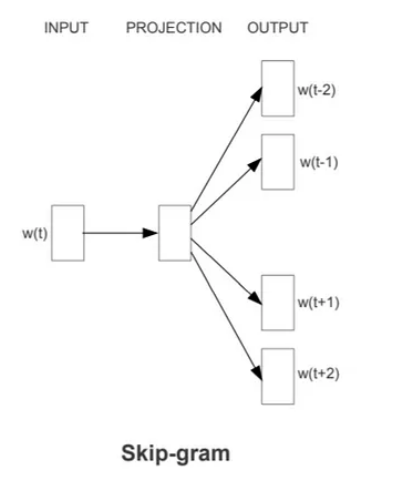
      
- CBOW : Distributed representation of the context ( or surrounding words) is used to:
    - predict the word in the middle   
      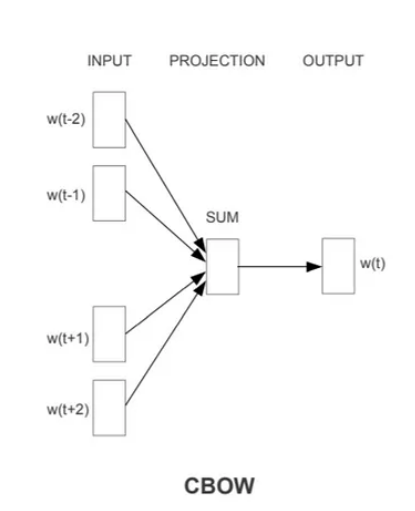
### sBERT 

# WordVec

- map words to a target variable 
- learn the weights represented by word vectors 

In [62]:
import pandas as pd 

df_products = pd.read_csv('../../Instacart dataset/products_.csv')
df_products.head() 

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [63]:
import nltk 
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec 

In [64]:
corpus = df_products['product_name'].apply(word_tokenize).tolist() 
print(corpus[:4])

[['Chocolate', 'Sandwich', 'Cookies'], ['All-Seasons', 'Salt'], ['Robust', 'Golden', 'Unsweetened', 'Oolong', 'Tea'], ['Smart', 'Ones', 'Classic', 'Favorites', 'Mini', 'Rigatoni', 'With', 'Vodka', 'Cream', 'Sauce']]


In [65]:
# skipgram model
# sg = 0 for CBOW architecture, sg=1 for skipgram architecture of Word2Vec 
model_skipgram = Word2Vec(sentences=corpus, vector_size=100, sg = 1)
model_cbow = Word2Vec(sentences=corpus, vector_size=100, sg = 0)
model_skipgram, model_cbow

(<gensim.models.word2vec.Word2Vec at 0x23812d044d0>,
 <gensim.models.word2vec.Word2Vec at 0x23810038210>)

In [66]:
all_words_skip = list(model_skipgram.wv.index_to_key)
all_words_cbow = list(model_cbow.wv.index_to_key)
print(all_words_skip[:5], len(all_words_skip)) 
print(all_words_cbow[:5], len(all_words_cbow)) 

['&', 'Organic', ',', 'Chocolate', 'Cheese'] 3877
['&', 'Organic', ',', 'Chocolate', 'Cheese'] 3877


In [67]:
embeddings_skip = model_skipgram.wv[all_words_skip]
embeddings_skip, embeddings_skip.shape  

(array([[-0.14972985,  0.2718607 , -0.19929339, ..., -0.38930407,
          0.45786455,  0.17999683],
        [-0.09377322,  0.41093764,  0.17918281, ..., -0.4315807 ,
         -0.07804276, -0.09683584],
        [-0.19017681,  0.16254598, -0.15005769, ..., -0.07861043,
          0.25748342, -0.21768054],
        ...,
        [-0.09416984,  0.11850157,  0.04255402, ..., -0.10219765,
          0.04269055, -0.06945089],
        [-0.09960527,  0.16674283,  0.07965735, ..., -0.02677275,
          0.03808481, -0.0588184 ],
        [-0.05768994,  0.11018287,  0.02135356, ..., -0.03291281,
          0.07117867,  0.00763126]], dtype=float32),
 (3877, 100))

In [68]:
embeddings_cbow = model_cbow.wv[all_words_cbow]
embeddings_cbow, embeddings_cbow.shape  

(array([[ 0.12116328,  0.19236392, -0.01184857, ..., -0.32912612,
          0.02940152,  0.39007726],
        [ 0.09114274,  0.52671397,  0.5524732 , ..., -0.9094191 ,
         -0.21690379, -0.24881804],
        [ 0.13147476,  0.01573711, -0.2504643 , ..., -0.3283733 ,
          0.29924256, -0.24288051],
        ...,
        [-0.05197051,  0.06685396,  0.02547536, ..., -0.05150022,
          0.01304149, -0.04224463],
        [-0.05148499,  0.06670807,  0.01944122, ..., -0.00794062,
          0.01734518, -0.02125324],
        [-0.02537914,  0.04407396,  0.01323793, ..., -0.01314896,
          0.0289281 , -0.01127182]], dtype=float32),
 (3877, 100))

In [69]:
from sklearn import decomposition
import matplotlib.pyplot as plt 
import scipy 

In [70]:
pca = decomposition.PCA(n_components=2)
embeddings_pca_skip = pca.fit_transform(embeddings_skip)
embeddings_pca_skip, embeddings_pca_skip.shape 

(array([[ 0.3642493 , -0.03595019],
        [ 0.8483613 ,  0.65366584],
        [ 0.05498863,  0.16609213],
        ...,
        [-0.11762637, -0.02740881],
        [-0.3997322 , -0.01364556],
        [-0.10032125, -0.30059013]], dtype=float32),
 (3877, 2))

In [71]:
pca = decomposition.PCA(n_components=2)
embeddings_pca_cbow = pca.fit_transform(embeddings_cbow)
embeddings_pca_cbow, embeddings_pca_cbow.shape 

(array([[ 0.7039102 , -0.69272834],
        [ 1.5792702 , -1.3956001 ],
        [ 0.63365155,  0.07632856],
        ...,
        [-0.6444768 , -0.0355704 ],
        [-0.7272602 , -0.00882719],
        [-0.7655432 , -0.05726846]], dtype=float32),
 (3877, 2))

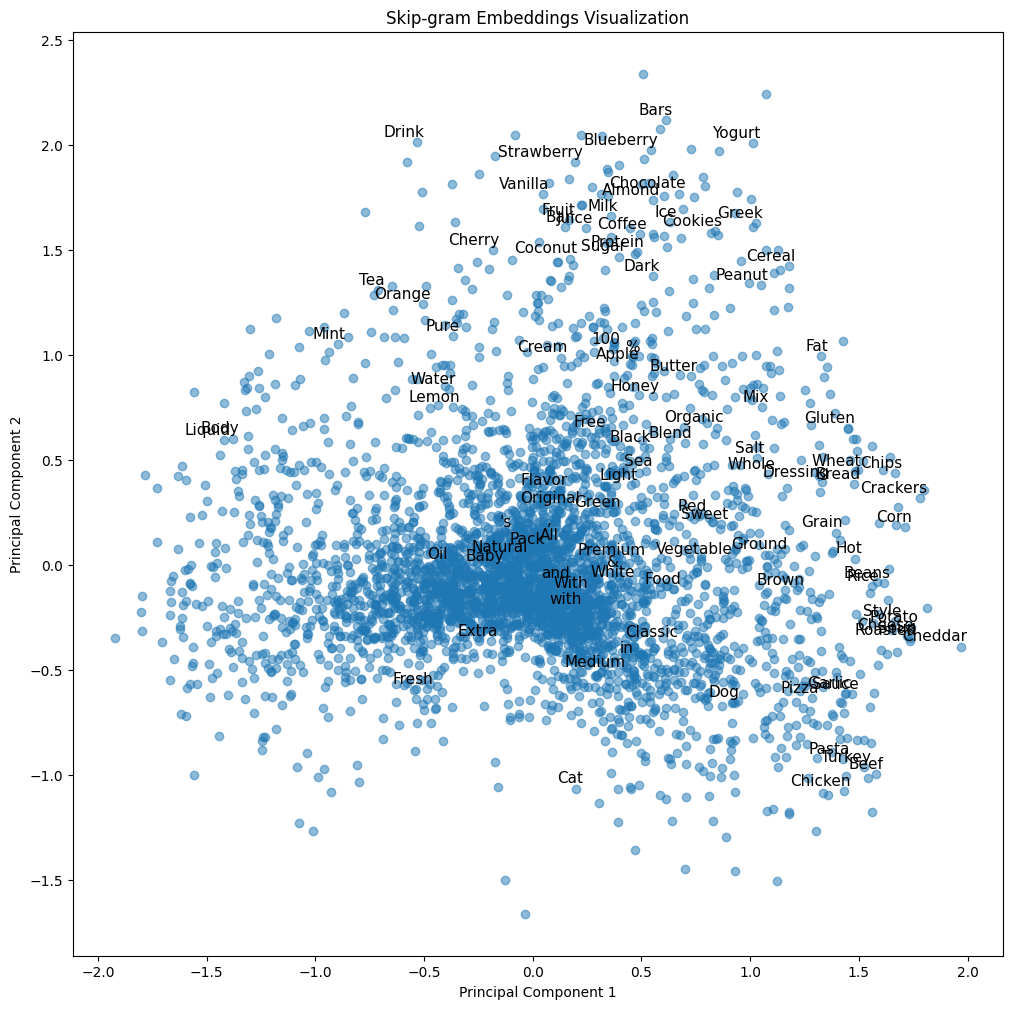

In [72]:
plt.figure(figsize=(12, 12))
plt.scatter(embeddings_pca_skip[:, 0], embeddings_pca_skip[:, 1], alpha=0.5)

for i, word in enumerate(all_words[:100]):
    plt.annotate(word, xy=(embeddings_pca_skip[i, 0], embeddings_pca_skip[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=11)

plt.title('Skip-gram Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

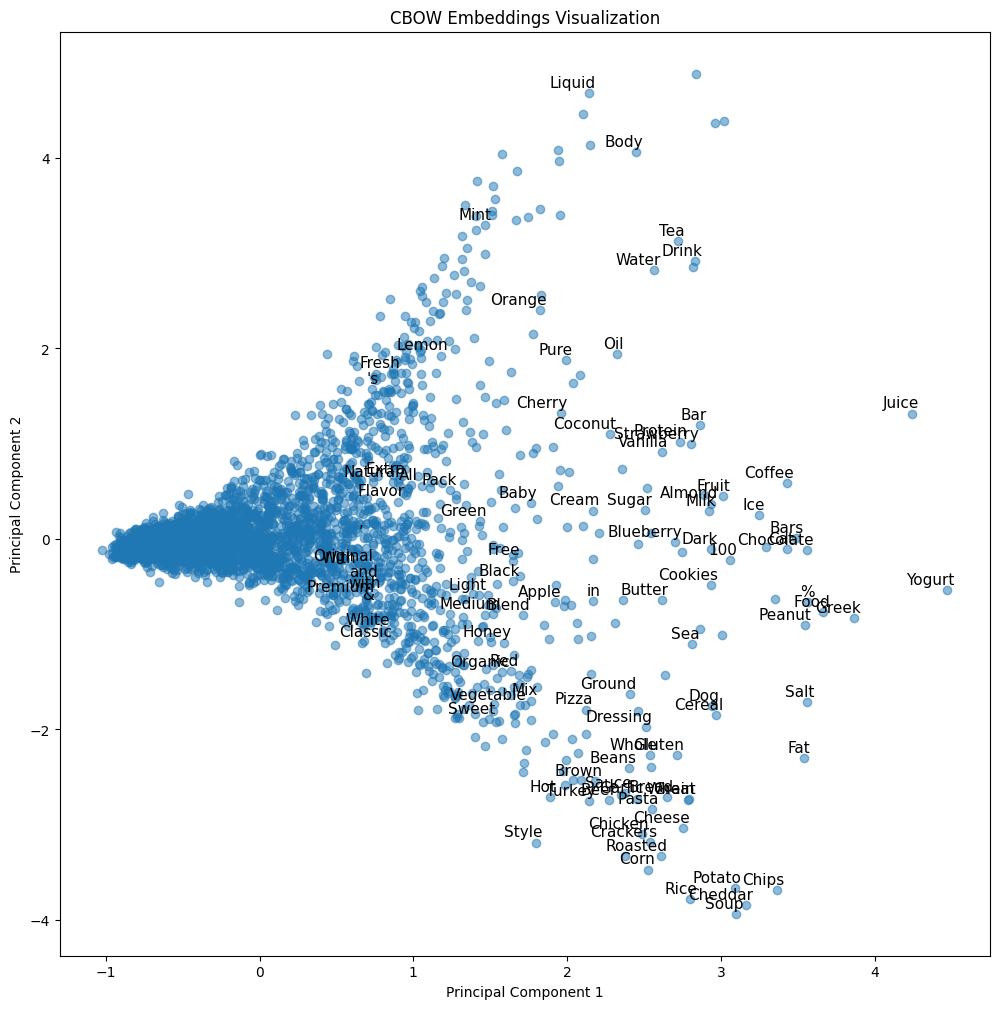

In [73]:
plt.figure(figsize=(12, 12))
plt.scatter(embeddings_pca_cbow[:, 0], embeddings_pca_cbow[:, 1], alpha=0.5)

for i, word in enumerate(all_words[:100]):
    plt.annotate(word, xy=(embeddings_pca_cbow[i, 0], embeddings_pca_cbow[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontsize=11)

plt.title('CBOW Embeddings Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [74]:
word = 'Mango' 

In [75]:
model_cbow.wv.most_similar(word) 

[('Pineapple', 0.9572562575340271),
 ('V-Fusion', 0.9480055570602417),
 ('Kiwi', 0.9460445642471313),
 ('Beet', 0.939275860786438),
 ('Smoothie', 0.9375355243682861),
 ('Blackberry', 0.9340927600860596),
 ('Peach', 0.9330605864524841),
 ('Pomegranate', 0.9289464354515076),
 ('Pear', 0.9253039360046387),
 ('Acai', 0.9170379638671875)]

In [76]:
model_skipgram.wv.most_similar(word) 

[('Pineapple', 0.8825652599334717),
 ('Pear', 0.8486990332603455),
 ('Peach', 0.8452950119972229),
 ('Blackberry', 0.8384647965431213),
 ('Kiwi', 0.8325326442718506),
 ('Fruits', 0.8240281939506531),
 ('Freeze', 0.8149245381355286),
 ('Nectar', 0.8047651648521423),
 ('Beet', 0.8010258674621582),
 ('Squeezable', 0.797091543674469)]